In [18]:

#!pip install nltk

In [19]:
#!pip install gensim

In [20]:
import pandas as pd
import gensim
from gensim.models import FastText
import nltk
from nltk.stem import WordNetLemmatizer
import re

In [61]:
import numpy as np
from seaborn import countplot
from pyemd import emd

In [21]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\velda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [23]:
#data_loc = 'data/'

In [24]:
data1 = pd.read_csv('winemag-data_first150k.csv', index_col=0)
data2 = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [25]:
data2 = data2.iloc[:75000]

In [26]:
#Panen andmed kokku
dataset = pd.concat([data1,data2])

In [27]:
dataset.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225925,Austria,"There is a slight, aromatic lift on the nose t...",NaN,88,14.0,Kremstal,NaN,NaN,Grüner Veltliner,Winzer Krems,Anne Krebiehl MW,@AnneInVino,Winzer Krems 2015 Grüner Veltliner (Kremstal)
225926,New Zealand,"This plump, dry-style Pinot Gris features plen...",NaN,88,15.0,Marlborough,NaN,NaN,Pinot Gris,Yealands,Joe Czerwinski,@JoeCz,Yealands 2016 Pinot Gris (Marlborough)
225927,Italy,"Made with 80% Sangiovese and 20% Syrah, this h...",NaN,88,22.0,Tuscany,Toscana,NaN,Red Blend,Ziobaffa,Kerin O’Keefe,@kerinokeefe,Ziobaffa 2015 Red (Toscana)
225928,US,One of the first bottles to bear the name of t...,Single Vineyard,88,30.0,Idaho,NaN,NaN,Syrah,3 Horse Ranch Vineyards,Sean P. Sullivan,@wawinereport,3 Horse Ranch Vineyards 2014 Single Vineyard S...


In [28]:
#Vaatan, mis toimub
dataset.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [29]:
desc = dataset.description

In [30]:
reviews_lower = [x.lower() for x in desc]

In [31]:
reviews_lower[3]

"this spent 20 months in 30% new french oak, and incorporates fruit from ponzi's aurora, abetina and madrona vineyards, among others. aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. drink now through 2032."

In [32]:
#Puhastan teksti sodist, aga võite vaielda, et äkki ikkagi on vaja mingit tüüpi arve säilitada (nt aastaarvud)
cleaned_reviews = [re.sub('[^a-zA-Z]', ' ', x) for x in reviews_lower]
cleaned_reviews = [re.sub(r'\s+', ' ', x) for x in cleaned_reviews]

In [33]:
cleaned_reviews[3]

'this spent months in new french oak and incorporates fruit from ponzi s aurora abetina and madrona vineyards among others aromatic dense and toasty it deftly blends aromas and flavors of toast cigar box blackberry black cherry coffee and graphite tannins are polished to a fine sheen and frame a finish loaded with dark chocolate and espresso drink now through '

In [34]:
nltk.download('punkt')
reviews = [nltk.sent_tokenize(x.strip()) for x in cleaned_reviews]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\velda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
reviews = [y for x in reviews for y in x]

In [36]:
reviews[3]

'this spent months in new french oak and incorporates fruit from ponzi s aurora abetina and madrona vineyards among others aromatic dense and toasty it deftly blends aromas and flavors of toast cigar box blackberry black cherry coffee and graphite tannins are polished to a fine sheen and frame a finish loaded with dark chocolate and espresso drink now through'

In [37]:
treviews = [nltk.word_tokenize(x) for x in reviews]

In [38]:
nltk.download('wordnet')
nltk.download('omw-1.4')
for i in range(len(treviews)):
    treviews[i] = [lemmatizer.lemmatize(w) for w in treviews[i] if w not in stop_words and len(w) > 1]
    # words[i] = [w for w in words[i] if w not in stop_words]
# words = [[w for w in words[i] if w not in stop_words] for i in range(len(words))]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\velda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\velda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
#Põhimõtteliselt on korpus valmis
treviews[3]

['spent',
 'month',
 'new',
 'french',
 'oak',
 'incorporates',
 'fruit',
 'ponzi',
 'aurora',
 'abetina',
 'madrona',
 'vineyard',
 'among',
 'others',
 'aromatic',
 'dense',
 'toasty',
 'deftly',
 'blend',
 'aroma',
 'flavor',
 'toast',
 'cigar',
 'box',
 'blackberry',
 'black',
 'cherry',
 'coffee',
 'graphite',
 'tannin',
 'polished',
 'fine',
 'sheen',
 'frame',
 'finish',
 'loaded',
 'dark',
 'chocolate',
 'espresso',
 'drink']

In [34]:
# Mudel, aga epohhe võiks rohkem olla (100)
# model = gensim.models.Word2Vec(words, vector_size = 200 , window = 4 , min_count = 1,
#                                seed = 1000, hs = 0, negative = 10,workers=16, epochs = 25)
model = gensim.models.FastText(treviews, vector_size = 200 , window = 4 , min_count = 1,
                               seed = 1000, hs = 0, negative = 10,workers=16, epochs = 25)

In [35]:
model.save("fastText.model")

In [15]:
model = FastText.load("fastText.model")

In [16]:
#Kümme kõige lähedasemat sõna sõnale "magus"
model.wv.most_similar('sweet')

[('sweeet', 0.9069340229034424),
 ('sweetbut', 0.8767389059066772),
 ('sweety', 0.8728753924369812),
 ('sweex', 0.8408980369567871),
 ('sweetshop', 0.8216612935066223),
 ('sweetzer', 0.8140934109687805),
 ('sweetish', 0.7818064093589783),
 ('sweetie', 0.7765190005302429),
 ('ultrasweet', 0.7725462317466736),
 ('sweetnees', 0.7623400092124939)]

In [17]:
#Kümme kõige lähedasemat sõna sõnale "kuiv"
model.wv.most_similar('dry')

[('dryly', 0.7381603121757507),
 ('nedry', 0.7218671441078186),
 ('tawdry', 0.7116608023643494),
 ('drysack', 0.6919692158699036),
 ('dryer', 0.6762170791625977),
 ('wizardry', 0.6171467900276184),
 ('ultradry', 0.6101483702659607),
 ('dryish', 0.5918757319450378),
 ('drylands', 0.58421790599823),
 ('laundry', 0.5464594960212708)]

Päris asjani on tükk maad veel. Mu arust võiks jõuda selleni, et saaks veinisoovitusi nii karakterit kirjeldavate märksõnade kui veininime järgi (ehk mis veinid oleksid konkreetsele veinile kõige sarnasemad). Word2veci saab ära kasutada selles mõttes, et märksõna järgi otsides ei pea istuma me kinni ühe kindla sõna küljes (nt kui otsime kuiva veini, siis me ei saa vastu ainult neid, mille kirjelduses on konkreetselt sõna "kuiv"), vaid saame võtta arvesse ka selle sünonüüme/semantiliselt lähedasi sõnu. Siinse katsetuse põhjal saame ehk algatada arutelu?

In [42]:
data = dataset.loc[:,  

               ["variety","country","province","points","price"]]

data['review']=treviews
data

,variety,country,province,points,price,review
0,Cabernet Sauvignon,US,California,96,235.0,"[tremendous, varietal, wine, hail, oakville, a..."
1,Tinta de Toro,Spain,Northern Spain,96,110.0,"[ripe, aroma, fig, blackberry, cassis, softene..."
2,Sauvignon Blanc,US,California,96,90.0,"[mac, watson, honor, memory, wine, made, mothe..."
3,Pinot Noir,US,Oregon,96,65.0,"[spent, month, new, french, oak, incorporates,..."
4,Provence red blend,France,Provence,95,66.0,"[top, wine, la, gude, named, highest, point, v..."
...,...,...,...,...,...,...
74995,Grüner Veltliner,Austria,Kremstal,88,14.0,"[slight, aromatic, lift, nose, turn, pear, fru..."
74996,Pinot Gris,New Zealand,Marlborough,88,15.0,"[plump, dry, style, pinot, gris, feature, plen..."
74997,Red Blend,Italy,Tuscany,88,22.0,"[made, sangiovese, syrah, aroma, red, berry, g..."
74998,Syrah,US,Idaho,88,30.0,"[one, first, bottle, bear, name, new, growing,..."


In [43]:
dvariety = data.loc[:,["variety","review"]]
dvariety.shape

(225930, 2)

In [44]:
dvariety.dropna(axis=0)
dvariety.shape

(225930, 2)

In [45]:
nvariety = pd.Series(dvariety['variety']).to_numpy()
type(nvariety)

numpy.ndarray

In [46]:
nreviews = pd.Series(dvariety['review']).to_numpy()
type(nreviews)

numpy.ndarray

In [47]:
varietylist= dvariety['variety'].unique() #number of unique varieties
len(varietylist)

720

In [48]:
nvariety= nvariety.astype(str)
nvariety.dtype

dtype('<U35')

<AxesSubplot:ylabel='count'>

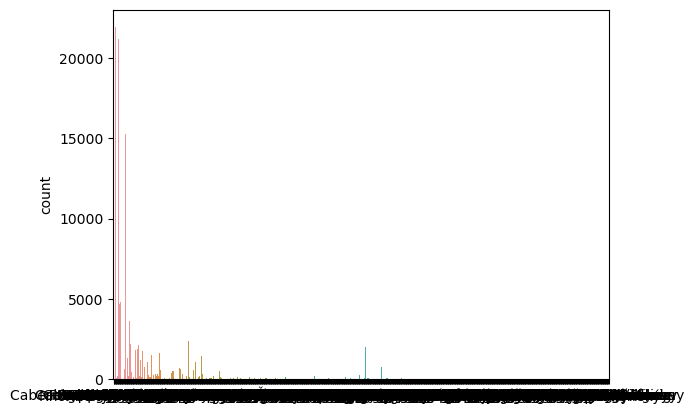

In [51]:
countplot(x=nvariety)

In [53]:
train_data= nreviews[:2000]
train_labels= nvariety[:2000]
test_data= nreviews[2000:3000]
test_labels= nvariety[2000:3000]
train_data.shape

(2000,)

<AxesSubplot:ylabel='count'>

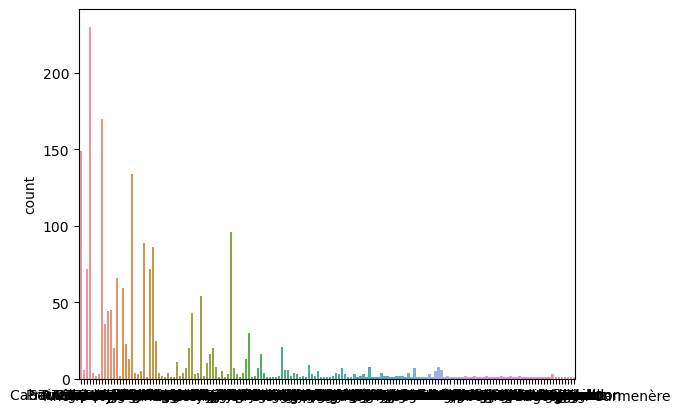

In [54]:
countplot(x=train_labels)

In [55]:
def dist(rev1, rev2):
  return model.wv.wmdistance(rev1, rev2)


In [56]:
dist(reviews[0], reviews[1])

0.14413991085135688

In [57]:
test_review = test_data[1] 
test_label = test_labels[1]

In [66]:
def classify(test_review,k):
    all_distances = np.array([dist(test_review, train_review) for train_review in train_data])
    sorted_idx = all_distances.argsort()
    n_closest = train_labels[sorted_idx][:k]
    unique, pos = np.unique(n_closest,return_inverse=True)
    counts = np.bincount(pos)
    maxpos = counts.argmax()
    prediction= unique[maxpos]
    return prediction

In [67]:
perdicted_label = classify(test_review,6)

In [68]:
print(f"Predicted variety for the first wine is {perdicted_label} and the true label is {test_label}")

Predicted variety for the first wine is Portuguese Red and the true label is Bordeaux-style Red Blend


In [69]:
test_predicted_n9 = [classify(test_review,9) for test_review in test_data]

In [70]:
n_correct_k9 = np.sum(test_labels == test_predicted_n9, dtype=object)
accuracy_k9 = n_correct_k9/len(test_labels)
print(accuracy_k9)
#Accuracy of the Word Mover's Distance classifier, k=9, in predicting the grape variety (FastText)

0.378
